In [1]:
import pandas as pd

train_df = pd.read_csv("train.tsv", delimiter="\t")[:10000]
test_df = pd.read_csv("test.tsv", delimiter="\t")[:10000]

print('Train size = {}'.format(len(train_df)))
print('Test size = {}'.format(len(test_df)))

Train size = 10000
Test size = 10000


Задание Придумайте хорошие ключевые слова или фразы и наберите хотя бы 71% точности на тесте (и не забудьте посмотреть на код классификации!)

In [21]:
#@title Начинаем классифицировать! { vertical-output: true, display-mode: "form" }
positive_words = 'excellent','common','surprised','sympathetic','moving','brilliant','refreshing','perfect','love', 'great', 'best', 'wonderful' #@param {type:"raw"}
negative_words = 'worse','annoying','skip','terrible','left','depicted','fails','uninteresting','worst', 'awful', '1/10', 'crap' #@param {type:"raw"}

positives_count = test_df.review.apply(lambda text: sum(word in text for word in positive_words))
negatives_count = test_df.review.apply(lambda text: sum(word in text for word in negative_words))
is_positive = positives_count > negatives_count
correct_count = (is_positive == test_df.is_positive).values.sum()

accuracy = correct_count / len(test_df)

print('Test accuracy = {:.2%}'.format(accuracy))
if accuracy > 0.71:
    print('ok')
    #from IPython.display import Image, display
    #display(Image('https://s3.amazonaws.com/achgen360/t/rmmoZsub.png', width=500))
#Test accuracy = 71.58%

Test accuracy = 71.58%
ok


Задание Кому-нибудь нравятся эти <br /><br />? Лично мне - нет. Напишите регулярку, которая будет их удалять

In [ ]:
import re

pattern = re.compile('<br />')

#print(train_df['review'].iloc[3])
#print(pattern.subn(' ', train_df['review'].iloc[3])[0])

In [ ]:
train_df['review'] = train_df['review'].apply(lambda text: pattern.subn(' ', text)[0])
test_df['review'] = test_df['review'].apply(lambda text: pattern.subn(' ', text)[0])

Задание Попробуйте запустить TfidfVectorizer. Посмотрите на ошибки, которые он научился исправлять, и на ошибки, которые он начал делать - по сравнению с CountVectorizer.

In [ ]:
#!pip install scikit-learn

In [18]:
from sklearn.metrics import accuracy_score

def eval_model(model, test_df):
    preds = model.predict(test_df['review'])
    print('Test accuracy = {:.2%}'.format(accuracy_score(test_df['is_positive'], preds)))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [22]:


vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)
#Test accuracy = 86.74%

Test accuracy = 86.74%


In [23]:
vectorizer = TfidfVectorizer(ngram_range=(1, 4))
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)
#Test accuracy = 85.18%


Test accuracy = 85.18%


Вывод. Точность ухудшилась, по разметке eli5 видно, что соседнии с значимыми токенами это "мусор". Надо чистить текст.

In [24]:
vectorizer = TfidfVectorizer(ngram_range=(2, 6), max_features=20000, analyzer='char')
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review'], train_df['is_positive'])

eval_model(model, test_df)
#Test accuracy = 86.21%

Test accuracy = 86.21%


In [ ]:
#!pip install eli5

In [ ]:
import eli5
# print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
# eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
#                      targets=['positive'], target_names=['negative', 'positive'])


In [ ]:
print('Positive' if test_df['is_positive'].iloc[1] else 'Negative')
eli5.show_prediction(classifier, test_df['review'].iloc[1], vec=vectorizer, 
                     targets=['positive'], target_names=['negative', 'positive'])

In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
docs_train = [doc for doc in nlp.pipe(train_df.review.values)]

In [ ]:
import pickle

In [ ]:

with open('train_docs.pkl', 'wb') as f:
    pickle.dump(docs_train, f)

In [ ]:
docs_test = [doc for doc in nlp.pipe(test_df.review.values)]

In [ ]:
with open('test_docs.pkl', 'wb') as f:
    pickle.dump(docs_test, f)

In [ ]:
with open('train_docs.pkl', 'rb') as f:
    train_docs = pickle.load(f)

In [ ]:
train_docs_str = [str(doc) for doc in train_docs]

In [ ]:
test_docs_str = [str(doc) for doc in test_docs]

In [ ]:
train_df['review_lem'] = train_docs_str

In [ ]:
train_df['review_lem'][:2]

In [ ]:
with open('test_docs.pkl', 'rb') as f:
    test_docs = pickle.load(f)

In [ ]:
test_df['review_lem']=test_docs_str

In [ ]:
train_df.to_csv("train_lem.tsv")
test_df.to_csv("test_lem.tsv")

In [20]:
vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review_lem'], train_df['is_positive'])

eval_model(model, test_df)
#Test accuracy = 86.74%


Test accuracy = 86.74%


In [2]:
train_df = pd.read_csv("train_lem.tsv")
test_df = pd.read_csv("test_lem.tsv")

In [3]:
from nltk import PorterStemmer

stemmer = PorterStemmer()

In [5]:
train_df['review_stem'] = train_df['review'].str.split()

In [6]:
train_df['review_stem'] = train_df['review_stem'].apply(lambda x: [stemmer.stem(y) for y in x]) 

In [9]:
train_df['review_stem'] = train_df['review_stem'].str.join(' ')

In [12]:
train_df['review_stem'][:3]

0    dreamgirls, despit it fist of toni win in an i...
1    thi show come up with interest locat as fast a...
2    i simpli love thi movie. i also love the ramon...
Name: review_stem, dtype: object

In [13]:
test_df['review_stem'] = test_df['review'].str.split()
test_df['review_stem'] = test_df['review_stem'].apply(lambda x: [stemmer.stem(y) for y in x]) 
test_df['review_stem'] = test_df['review_stem'].str.join(' ')

In [14]:
train_df.to_csv("train_lem_stem.tsv")
test_df.to_csv("test_lem_stem.tsv")

In [19]:
vectorizer = TfidfVectorizer()
classifier = LogisticRegression()

model = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier)
])

model.fit(train_df['review_stem'], train_df['is_positive'])

eval_model(model, test_df)
#Test accuracy = 83.49%


Test accuracy = 83.49%


<BarContainer object of 173 artists>

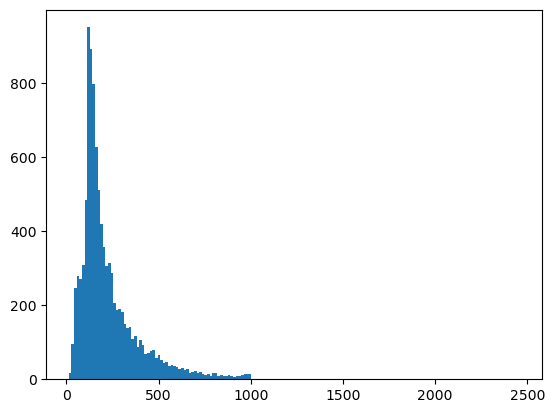

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

_, _, hist = plt.hist(train_df.review.apply(lambda text: len(text.split())), bins='auto')
hist

In [26]:
from collections import Counter

words_counter = Counter((word for text in train_df.review for word in text.lower().split()))

word2idx = {
    '': 0,
    '<unk>': 1
}
for word, count in words_counter.most_common():
    if count < 10:
        break
        
    word2idx[word] = len(word2idx)
    
print('Words count', len(word2idx))

Words count 13718


In [29]:
import numpy as np
def convert(texts, word2idx, max_text_len):
    data = np.zeros((len(texts), max_text_len), dtype=int)
    
    for inx, text in enumerate(texts):
        result = []
        for word in text.split():
            if word in word2idx:
                result.append(word2idx[word])
        padding = [0]*(max_text_len - len(result))
        data[inx] = np.array(padding + result[-max_text_len:], dtype=int)
    return data

X_train = convert(train_df.review, word2idx, 1000)
X_test = convert(test_df.review, word2idx, 1000)

In [32]:
X_train[:3],X_test[:3]

(array([[   0,    0,    0, ...,   27, 2064,   14],
        [   0,    0,    0, ...,   43,    2, 3312],
        [   0,    0,    0, ...,   86, 1395,   98]]),
 array([[   0,    0,    0, ..., 1206,  947,    3],
        [   0,    0,    0, ...,  157,  628,   98],
        [   0,    0,    0, ...,    2, 2141, 3562]]))

In [36]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.3 MB/s eta 0:00:002.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.0 MB/s eta 0:00:009.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 2.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 939.2 kB/s eta 0:00:0031m3.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 2.0 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 4.2 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01
 

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.6.3
    Uninstalling typing_extensions-4.6.3:
      Successfully uninstalled typing_extensions-4.6.3


In [37]:
import tensorflow as tf
tf.__version__

2023-07-14 15:05:03.190628: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-14 15:05:03.231405: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-14 15:05:03.232371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-14 15:05:04.270073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'2.13.0'

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout

In [39]:
model = Sequential([
    Embedding(input_dim=len(word2idx), output_dim=64, input_shape=(X_train.shape[1],)),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=10, activation='relu'),
    
    Dense(units=1, activation='sigmoid')
])

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 64)          877952    
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 878723 (3.35 MB)
Trainable params: 878723 (3.35 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [40]:
model.fit(X_train, train_df.is_positive, batch_size=128, epochs=10, 
          validation_data=(X_test, test_df.is_positive))

Epoch 1/10
79/79 [==============================] - 8s 87ms/step - loss: 0.6854 - accuracy: 0.5412 - val_loss: 0.6649 - val_accuracy: 0.7063
Epoch 2/10
79/79 [==============================] - 6s 81ms/step - loss: 0.5994 - accuracy: 0.7718 - val_loss: 0.5237 - val_accuracy: 0.8137
Epoch 3/10
79/79 [==============================] - 6s 81ms/step - loss: 0.3952 - accuracy: 0.8806 - val_loss: 0.3722 - val_accuracy: 0.8481
Epoch 4/10
79/79 [==============================] - 7s 82ms/step - loss: 0.2290 - accuracy: 0.9255 - val_loss: 0.3315 - val_accuracy: 0.8581
Epoch 5/10
79/79 [==============================] - 6s 82ms/step - loss: 0.1358 - accuracy: 0.9621 - val_loss: 0.3311 - val_accuracy: 0.8591
Epoch 6/10
79/79 [==============================] - 6s 80ms/step - loss: 0.0764 - accuracy: 0.9840 - val_loss: 0.3477 - val_accuracy: 0.8564
Epoch 7/10
79/79 [==============================] - 7s 88ms/step - loss: 0.0421 - accuracy: 0.9942 - val_loss: 0.3784 - val_accuracy: 0.8506
Epoch 8/10
79

In [44]:
Y_test = test_df['is_positive']
Y_train = train_df['is_positive']

In [42]:
res = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [45]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print('test loss, test acc:', results)

79/79 [==============================] - 1s 16ms/step - loss: 0.4325 - accuracy: 0.8501
test loss, test acc: [0.4324510395526886, 0.8500999808311462]
